In [25]:
import pandas as pd
import numpy as np
import os

print(os.getcwd())
df_audjpy = pd.read_csv('../data/audjpy.csv')
df_audjpy['AUDJPY_Fwd'] = df_audjpy['AUDJPY'] + df_audjpy['AUDJPY3M']/100
df_audjpy['AUDJPY_FwdSlope'] = (252/63) * np.log(df_audjpy['AUDJPY_Fwd'] / df_audjpy['AUDJPY'])
df_audjpy['AUDJPY_Spot3MFwd'] = df_audjpy['AUDJPY'].shift(21*3)
df_audjpy['AUDJPY_OutperfVsFwd'] = (df_audjpy['AUDJPY_Fwd'] - df_audjpy['AUDJPY_Spot3MFwd']) / df_audjpy['AUDJPY_Fwd']
df_audjpy['AUDJPY_SpotChange'] = (df_audjpy['AUDJPY'] - df_audjpy['AUDJPY_Spot3MFwd']) / df_audjpy['AUDJPY']
df_audjpy

/Users/christopherkelliher/Documents/BUCourses/esck1/Book/MyBook/chapters/chapter15/code


,Dates,AUDJPY,AUDJPY3M,AUDJPY_Fwd,AUDJPY_FwdSlope,AUDJPY_Spot3MFwd,AUDJPY_OutperfVsFwd,AUDJPY_SpotChange
0,1/3/2011,83.105,-101.83,82.0867,-0.049315,NaN,NaN,NaN
1,1/4/2011,82.453,-100.37,81.4493,-0.048991,NaN,NaN,NaN
2,1/5/2011,83.210,-100.95,82.2005,-0.048825,NaN,NaN,NaN
3,1/6/2011,82.848,-99.93,81.8487,-0.048541,NaN,NaN,NaN
4,1/7/2011,82.801,-100.78,81.7932,-0.048984,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2745,7/12/2021,82.537,-3.24,82.5046,-0.001571,84.142,-0.019846,-0.019446
2746,7/13/2021,82.383,-3.16,82.3514,-0.001535,84.304,-0.023711,-0.023318
2747,7/14/2021,82.259,-3.01,82.2289,-0.001464,84.151,-0.023375,-0.023001
2748,7/15/2021,81.538,-2.92,81.5088,-0.001433,83.896,-0.029288,-0.028919


In [26]:
df_audjpy['AUDJPY_OutperfVsFwd'].mean()*252/63, df_audjpy['AUDJPY_SpotChange'].mean()*252/63, df_audjpy['AUDJPY_FwdSlope'].mean()

(-0.03006229872131117, -0.004911108109353585, -0.02550146332430399)

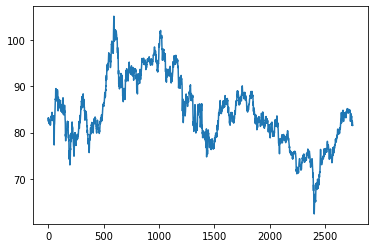

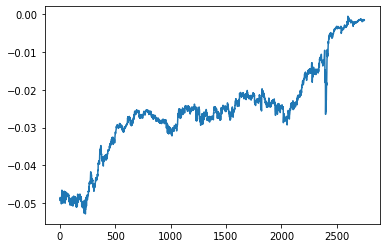

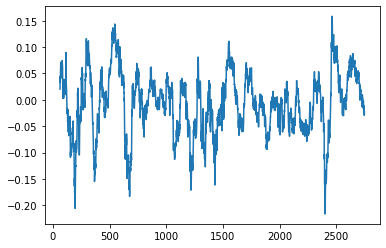

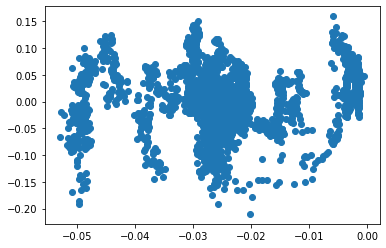

In [31]:
import matplotlib.pyplot as plt

#visualization 1: time series of spot
plt.plot(df_audjpy['AUDJPY'])
plt.show()

#visualization 2: time series of slope of forward curve
plt.plot(df_audjpy['AUDJPY_FwdSlope'])
plt.show()

#visualization 3: time series of fwd underperformance/overperformance
plt.plot(df_audjpy['AUDJPY_OutperfVsFwd'])
plt.show()

#visualization 4: scatter of fwd slope vs. spot return
plt.scatter(df_audjpy['AUDJPY_FwdSlope'], df_audjpy['AUDJPY_SpotChange'])
plt.show()